In [2]:
import logging
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from icecream import ic

In [309]:
class Problem:
    _graph: nx.Graph
    _alpha: float
    _beta: float

    def __init__(
        self,
        num_cities: int,
        *,
        alpha: float = 1.0,
        beta: float = 1.0,
        density: float = 0.5,
        seed: int = 42,
    ):
        rng = np.random.default_rng(seed)
        self._alpha = alpha
        self._beta = beta
        cities = rng.random(size=(num_cities, 2))
        cities[0, 0] = cities[0, 1] = 0.5

        self._graph = nx.Graph()
        self._graph.add_node(0, pos=(cities[0, 0], cities[0, 1]), gold=0)
        for c in range(1, num_cities):
            self._graph.add_node(c, pos=(cities[c, 0], cities[c, 1]), gold=(1 + 999 * rng.random()))

        tmp = cities[:, np.newaxis, :] - cities[np.newaxis, :, :]
        d = np.sqrt(np.sum(np.square(tmp), axis=-1))
        for c1, c2 in combinations(range(num_cities), 2):
            if rng.random() < density or c2 == c1 + 1:
                self._graph.add_edge(c1, c2, dist=d[c1, c2])

        assert nx.is_connected(self._graph)

    @property
    def graph(self) -> nx.Graph:
        return nx.Graph(self._graph)

    @property
    def dist_dict(self):
        return {(u, v): data['dist'] for u, v, data in self._graph.edges(data=True)}

    @property
    def gold_dict(self):
        return {n: data['gold'] for n, data in self._graph.nodes(data=True)}

    def cost(self, path, weight):
        dist = nx.path_weight(self._graph, path, weight='dist')
        return dist + (self._alpha * dist * weight) ** self._beta

    def baseline(self):
        cost = 0
        for dest, path in nx.single_source_dijkstra_path(
            self._graph, source=0, weight='weight'
        ).items():
            if dest == 0:
                continue
            logging.debug(
                f"dummy_solution: go to {dest} ({' > '.join(str(n) for n in path)}) -- cost: {self.cost(path, 0):.2f}"
            )
            logging.debug(f"dummy_solution: grab {self._graph.nodes[dest]['gold']:.2f}kg of gold")
            logging.debug(
                f"dummy_solution: return to 0 ({' > '.join(str(n) for n in reversed(path))}) -- cost: {self.cost(path, self._graph.nodes[dest]['gold']):.2f}"
            )
            cost += self.cost(path, 0) + self.cost(path, self._graph.nodes[dest]['gold'])
        logging.info(f"dummy_solution: total cost: {cost:.2f}")
        return cost

    def plot(self):
        plt.figure(figsize=(10, 10))
        pos = nx.get_node_attributes(self._graph, 'pos')
        size = [100] + [self._graph.nodes[n]['gold'] for n in range(1, len(self._graph))]
        color = ['red'] + ['lightblue'] * (len(self._graph) - 1)
        return nx.draw(self._graph, pos, with_labels=True, node_color=color, node_size=size)

ic| P.baseline(): np.float64(9812.361193310946)
| P.baseline(): np.float64(9812.361193310946)


np.float64(9812.361193310946)

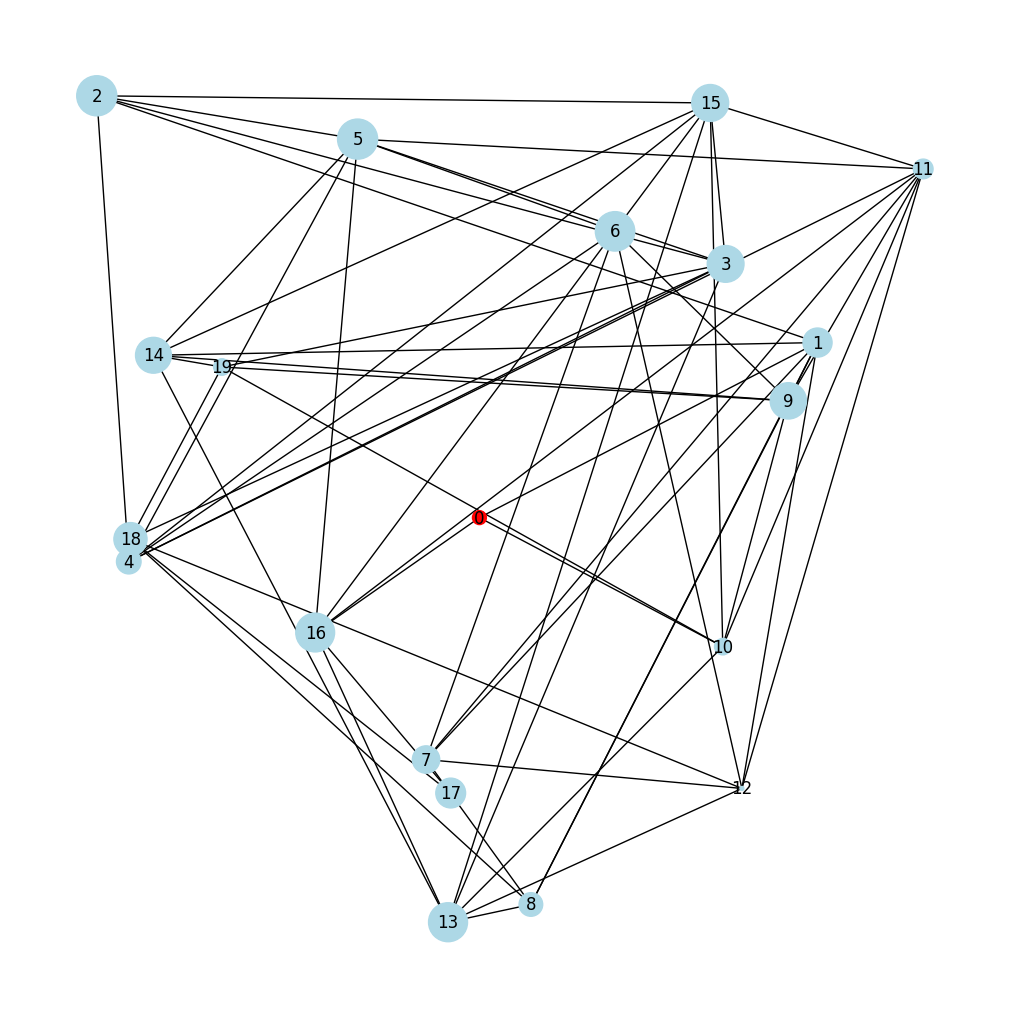

In [310]:
P = Problem(20, density=0.2, alpha=1, beta=1)
P.plot()
ic(P.baseline())

In [5]:
logging.getLogger().setLevel(logging.WARNING)

ic(Problem(100, density=0.2, alpha=1, beta=1).baseline())
ic(Problem(100, density=0.2, alpha=2, beta=1).baseline())
ic(Problem(100, density=0.2, alpha=1, beta=2).baseline())
ic(Problem(100, density=1, alpha=1, beta=1).baseline())
ic(Problem(100, density=1, alpha=2, beta=1).baseline())
ic(Problem(100, density=1, alpha=1, beta=2).baseline())
ic(Problem(1_000, density=0.2, alpha=1, beta=1).baseline())
ic(Problem(1_000, density=0.2, alpha=2, beta=1).baseline())
ic(Problem(1_000, density=0.2, alpha=1, beta=2).baseline())
ic(Problem(1_000, density=1, alpha=1, beta=1).baseline())
ic(Problem(1_000, density=1, alpha=2, beta=1).baseline())
ic(Problem(1_000, density=1, alpha=1, beta=2).baseline())

None

ic| Problem(100, density| Problem(100, density

=0.20.2, alpha=1, beta=1)., alpha=1, beta=1).baseline(): np.float64(38815.58297841784)
baseline(): np.float64(38815.58297841784)
ic| Problem(100, density=ic| Problem(100, density=0.2, alpha=2, 0.2, alpha=2, beta=1).baseline(): np.float64(beta=1).baseline(): np.float64(77458.9660062505)
77458.9660062505)
ic| ic| Problem(100, density=0.2, alpha=Problem(100, density=0.2, alpha=1, 1, beta=2).baseline(): beta=2).baseline(): np.float64(24369662.257814802)
np.float64(24369662.257814802)
ic| Problem(100, density=1, alpha=ic| Problem(100, density=1, alpha=1, beta=1, beta=1).baseline(): np.float64(18266.185795826721).baseline(): np.float64(18266.18579582672)
)
ic| Problem(100, density=1,ic| Problem(100, density=1, alpha=2, beta=1).baseline() alpha=2, beta=1).baseline(): np.float64(36457.918462372065)
: np.float64(36457.918462372065)
ic| Problem(100, densityic| Problem(100, density=1, alpha=1, beta==1, alpha=1, beta=2).baseline()2).baseline(): np.float64(5404978.08899582: np.float64(5404978.08899

In [6]:
def insert_random_mutation(path, all_nodes):
    """Inserts a random node at a random position in the path."""
    new_path = path.copy()
    

    node_to_insert = random.choice(all_nodes)

    insert_position = random.randint(1, len(new_path) - 1)  # Avoid inserting at start or end

    new_path.insert(insert_position, (node_to_insert, False))
    return new_path

In [7]:
def invert_mutation(path, infeas_nodes, probability=0.5 ):
    """Inverts a random segment of the path."""
    new_path = path.copy()
    if random.random() > probability and infeas_nodes!=[]:
        start_index = random.choice(infeas_nodes)
        if start_index==len(new_path)-2:
            start_index = random.randint(1, len(new_path) - 2)
    else:
        start_index = random.randint(1, len(new_path) - 3)  # Avoid start and end
    end_index = random.randint(start_index + 1, len(new_path) - 2)

    new_path[start_index:end_index + 1] = reversed(new_path[start_index:end_index + 1])
    return new_path

In [8]:
def switch_and_insert_mutation(path, all_nodes):
    """Toggle an element to inactive then re-insert it elsewhere as active.

    - Chooses a random index (not start/end) to deactivate; if already inactive,
      performs an insert mutation instead.
    - Ensures indexing checks avoid out-of-range errors.
    """
    new_path = path.copy()
    total_length = len(new_path)

    # If path is too short, nothing to do
    if total_length <= 2:
        return new_path

    # pick an index that is not the first (start) or last (end)
    deactivate_index = random.randrange(1, total_length - 1)

    if new_path[deactivate_index][1] == False:
        # If the chosen node is already inactive, do a simple insert mutation
        
        return insert_random_mutation(path, all_nodes=all_nodes)
    else:
        node_id = new_path[deactivate_index][0]
        # deactivate the chosen position
        new_path[deactivate_index] = (node_id, False)

        # Try to find a safe insert position that doesn't create immediate duplicates
        max_tries = 20
        insert_position = None
        for _ in range(max_tries):
            candidate = random.randint(1, len(new_path) - 1)
            prev_node = new_path[candidate - 1][0]
            next_node = new_path[candidate][0] if candidate < len(new_path) else None
            if prev_node != node_id and (next_node is None or next_node != node_id):
                insert_position = candidate
                break

        # Fallback: insert anywhere valid
        if insert_position is None:
            insert_position = random.randint(1, len(new_path) - 1)

        new_path.insert(insert_position, (node_id, True))

    return new_path


In [331]:
def calculate_full_path_cost(problem_instance, path):
    """
    Calcola il costo totale del percorso nel formato (nodo, is_active) 
    usando CORRETTAMENTE la formula cost() del Problem.
    
    LOGICA:
    - Identifica segmenti andata (0 → dest) e ritorno (dest → 0)
    - Per segmento andata: usa weight=0 (nessun oro ancora caricato)
    - Raccoglie oro quando visita nodo con flag True
    - Per segmento ritorno: usa weight=oro_accumulato
    - Resetta oro quando torna a 0
    
    Restituisce: (infeasible_count, total_cost, infeasible_nodes)
    dove infeasible_nodes è una lista di nodi i cui archi al successivo non esistono
    """
    
    total_cost = 0.0
    current_weight = 0.0
    infeasible_nodes = []
    
    dist_dict = problem_instance.dist_dict
    gold_dict = problem_instance.gold_dict
    
    for i in range(len(path) - 1):
        u = path[i][0]
        v = path[i + 1][0]
        u_flag = path[i][1]  # is_active del nodo corrente
        
        # Se il nodo corrente ha flag True e non è 0, accumula oro
        if u != 0 and u_flag == True:
            gold_at_u = gold_dict.get(u, 0)
            current_weight += gold_at_u
        
        # Resetta il peso quando torniamo a 0
        if u == 0 and current_weight > 0:
            current_weight = 0.0
        
        # Calcola il costo dell'arco u → v
        dist_uv = dist_dict.get((min(u, v), max(u, v)))
        if dist_uv is None:
            # L'arco non esiste: nodo infeasible
            infeasible_nodes.append(u)
            dist_uv = 1.0  # Penalità di default
        
        # Applica la formula cost() = dist + (alpha * dist * weight)^beta
        cost_segment = dist_uv + (problem_instance._alpha * dist_uv * current_weight) ** problem_instance._beta
        total_cost += cost_segment
    
    return (len(infeasible_nodes), total_cost, infeasible_nodes)


def make_route(path):
    """
    Converte un percorso a una tupla (path, infeasible_nodes) calcolando l'infeasibility.
    Usa calculate_full_path_cost per ottenere automaticamente i nodi infeasible.
    """
    # Placeholder: sarà calcolato quando necessitiamo del costo
    return (path, [])


def get_path_with_infeasibility(problem_instance, path):
    """
    Ritorna (path, infeasible_nodes, cost_tuple) dove:
    - path: il percorso originale
    - infeasible_nodes: lista di nodi senza connessione al successivo
    - cost_tuple: (infeasible_count, total_cost, infeasible_nodes)
    """
    count, cost, infeasible = calculate_full_path_cost(problem_instance, path)
    return (path, infeasible, (count, cost, infeasible))


In [332]:
calculate_full_path_cost(P, [(0, True), (1, True),(0, True)])   

(0, np.float64(179.98605976102178), [])

In [10]:
def neighborhood_greedy_strategy_near(problem_instance):
    """
    Costruisce un percorso usando BFS-style neighborhood exploration.
    
    ALGORITMO:
    - Parte da nodo 0
    - Per ogni nodo, mantiene il percorso (path) da 0 a quel nodo
    - Esplora i vicini usando una coda BFS ordinati per distanza (più vicino prima)
    - Per ogni nodo raggiunto, lo marca come visitato
    - Costruisce il path completo visitando tutti i nodi in ordine BFS
    - Ogni nodo destinazione ha flag True, altri hanno flag False
    
    Restituisce: path_list (lista dei percorsi da 0 a ogni nodo ordinati per nodo ID)
    """
    graph = problem_instance.graph
    
    
    # Dizionario: nodo -> percorso da 0 a nodo (lista di nodi)
    node_to_path = {0: [0]}
    
    # Coda BFS
    queue = [0]
    visited = {0}
    unreached = set(graph.nodes()) - {0}
    
    # BFS exploration
    step = 0
    while queue and unreached:
        current = queue.pop(0)
        current_path = node_to_path[current]
        
        # Cerca i vicini di current
        neighbors = list(graph.neighbors(current))
        
        # Ordina i vicini per distanza (dal più vicino al più lontano)
        current_pos = np.array(graph.nodes[current]['pos'])
        neighbors_with_dist = []
        for n in neighbors:
            neighbor_pos = np.array(graph.nodes[n]['pos'])
            dist = np.linalg.norm(current_pos - neighbor_pos)
            neighbors_with_dist.append((n, dist))
        
        neighbors_with_dist.sort(key=lambda x: x[1])
        neighbors = [n for n, _ in neighbors_with_dist]
        
        # Filtra solo quelli non ancora visitati
        unvisited_neighbors = [n for n in neighbors if n not in visited]     
        for neighbor in unvisited_neighbors:
            visited.add(neighbor)
            new_path = current_path + [neighbor]
            node_to_path[neighbor] = new_path
            queue.append(neighbor)
            
            if neighbor in unreached:
                unreached.remove(neighbor)        
    # Crea path_list: lista dei percorsi di ogni nodo ordinati per nodo ID
    path_list = [node_to_path[node] for node in sorted(node_to_path.keys())]

    return path_list



In [11]:
def neighborhood_greedy_strategy_random(problem_instance, seed=None):
    """
    Costruisce un percorso usando BFS-style neighborhood exploration.
    
    ALGORITMO:
    - Parte da nodo 0
    - Per ogni nodo, mantiene il percorso (path) da 0 a quel nodo
    - Esplora i vicini usando una coda BFS
    - Per ogni nodo raggiunto, lo marca come visitato
    - Costruisce il path completo visitando tutti i nodi in ordine BFS
    - Ogni nodo destinazione ha flag True, altri hanno flag False
    
    Restituisce: (full_path, path_list)
    - full_path: path nel formato [(nodo, is_active), ...]
    - path_list: lista dei percorsi da 0 a ogni nodo ordinati per nodo ID
    """
    graph = problem_instance.graph
    rng = random.Random(seed)
    
    # Dizionario: nodo -> percorso da 0 a nodo (lista di nodi)
    node_to_path = {0: [0]}
    
    # Coda BFS: (nodo_corrente, profondità)
    queue = [0]
    visited = {0}
    unreached = set(graph.nodes()) - {0}
    
    # BFS exploration
    step = 0
    while queue and unreached:
        current = queue.pop(0)
        current_path = node_to_path[current]
        
        # Cerca i vicini di current
        neighbors = list(graph.neighbors(current))
        neighbors.sort(key=lambda x: rng.random())  # Shuffle neighbors for randomness
        # Filtra solo quelli non ancora visitati
        unvisited_neighbors = [n for n in neighbors if n not in visited]     
        for neighbor in unvisited_neighbors:
            visited.add(neighbor)
            new_path = current_path + [neighbor]
            node_to_path[neighbor] = new_path
            queue.append(neighbor)
            
            if neighbor in unreached:
                unreached.remove(neighbor)
        
    # Crea path_list: lista dei percorsi di ogni nodo ordinati per nodo ID
    path_list = [node_to_path[node] for node in sorted(node_to_path.keys())]

    return path_list




In [12]:
def neighborhood_greedy_strategy_dijistra(problem_instance):
   
   
    graph = problem_instance.graph
    node_to_path =dict(nx.single_source_dijkstra_path(graph, source=0, weight='dist'))





        
    # Crea path_list: lista dei percorsi di ogni nodo ordinati per nodo ID
    path_list = [node_to_path[node] for node in sorted(node_to_path.keys())]
    

    return path_list



print(neighborhood_greedy_strategy_dijistra(P))




[[0], [0, 1], [0, 16, 5, 2], [0, 10, 15, 3], [0, 16, 5, 4], [0, 16, 5], [0, 1, 9, 6], [0, 16, 13, 8, 7], [0, 16, 13, 8], [0, 1, 9], [0, 10], [0, 1, 9, 11], [0, 1, 12], [0, 16, 13], [0, 10, 19, 14], [0, 10, 15], [0, 16], [0, 16, 17], [0, 16, 17, 18], [0, 10, 19]]


In [62]:
def choice_a_path(path_list,seed=42):
    full_path=[]
    rng=random.Random(seed)
    ungolden_nodes=[i for i in range(1, len(path_list))]
    while ungolden_nodes:
        
        node=rng.choice(ungolden_nodes)
        
        path_for_node=list(path_list[node].copy())
        for p in path_for_node[:-1]:
            full_path.append((p, False))
        path_for_node.reverse()
        

        for  p in (path_for_node[:-1]):

            if p in ungolden_nodes:
                full_path.append((p, True))
                ungolden_nodes.remove(p)
                
            else:
                full_path.append((p,False))
            
    full_path.append((0,False))
    return(full_path)



x=neighborhood_greedy_strategy_dijistra(P)
print(x)
Y=choice_a_path(x,seed=random.randint(0,1000))
print(x)
print(Y)
print(calculate_full_path_cost(P,Y))




[[0], [0, 1], [0, 2], [0, 4, 3], [0, 4]]
[[0], [0, 1], [0, 2], [0, 4, 3], [0, 4]]
[(0, False), (2, True), (0, False), (4, False), (3, True), (4, True), (0, False), (1, True), (0, False)]
(0, np.float64(1747.8199260090782), [])


In [14]:
def dijkstra_baseline_strategy(problem_instance):
    """
    Ricostruisce la strategia baseline() nel tuo formato con tuple (nodo, is_active).
    
    STRATEGIA:
    - Per ogni nodo destinazione (tranne base 0), usa Dijkstra per trovare il percorso più breve
    - Visita nodo con flag True (raccoglie oro)
    - Torna a 0 con il carico d'oro
    - Ripete per tutti i nodi non visitati
    
    RITORNA:
    - path: lista di tuple (nodo, is_active) nel tuo formato
    - cost_tuple: (infeasible_count, total_cost, infeasible_nodes)
    """
    graph = problem_instance.graph
    alpha = problem_instance._alpha
    beta = problem_instance._beta
    
    # Calcola i percorsi più brevi da 0 a tutti i nodi
    dijkstra_paths = dict(nx.single_source_dijkstra_path(graph, source=0, weight='dist'))
    
    # Ordina i nodi per visitarli (escludendo la base)
    nodes_to_visit = sorted([n for n in graph.nodes() if n != 0])
    
    # Costruisci il percorso completo
    full_path = [(0, False)]  # Partenza dalla base
    
    for dest in nodes_to_visit:
        # Percorso andata (0 → dest)
        andata = dijkstra_paths[dest]  # es: [0, 5, 10, dest]
        
        # Aggiungi nodi intermedi con flag False (non raccolgono oro)
        for i in range(1, len(andata) - 1):
            full_path.append((andata[i], False))
        
        # Aggiungi destinazione con flag True (raccoglie oro)
        full_path.append((dest, True))
        
        # Percorso ritorno (dest → 0) - inverti il percorso
        ritorno = list(reversed(andata))  # es: [dest, 10, 5, 0]
        
        # Aggiungi nodi intermedi con flag False
        for i in range(1, len(ritorno) - 1):
            full_path.append((ritorno[i], False))
        
        # Torna a base (senza nuovo flag True)
        full_path.append((0, False))
    
    # Calcola infeasibility del percorso generato
    cost_tuple = calculate_full_path_cost(problem_instance, full_path)
    
    return full_path, cost_tuple

print(dijkstra_baseline_strategy(P)[1])


(0, np.float64(7330.745373832982), [])


In [15]:
def hill_climbing(problem_instance, initial_solution, n_iterations=300, probability_of_iteration=0.3, probability_of_inversion=0.8):
    current_solution = initial_solution
    infeas_count, current_cost, current_infeas_nodes = calculate_full_path_cost(problem_instance, current_solution)

    all_nodes = list(range(len(problem_instance.graph.nodes())))
    

    for iteration in range(n_iterations):

        neighbor_solution = invert_mutation(current_solution, current_infeas_nodes)
        while random.random() < probability_of_iteration:
            if random.random() < probability_of_inversion:
                neighbor_solution = switch_and_insert_mutation(neighbor_solution, all_nodes=all_nodes)
            neighbor_solution = invert_mutation(neighbor_solution, current_infeas_nodes)
        
        neighbor_infeas, neighbor_cost, neighbor_infeas_nodes = calculate_full_path_cost(problem_instance, neighbor_solution)
        
        # Accetta se riduce infeasibility, altrimenti se riduce il costo
        if  neighbor_cost <= current_cost:
            current_solution = neighbor_solution
            current_cost = neighbor_cost
            current_infeas_nodes = neighbor_infeas_nodes
            infeas_count = neighbor_infeas
    
    return current_solution, (infeas_count, current_cost, current_infeas_nodes)


In [ ]:
def create_population(problem_instance, population_size, proportion=0.8):
    population = []
    near_list=neighborhood_greedy_strategy_dijistra(problem_instance=problem_instance)
    for n in range(population_size):
        if random.random() < proportion:

            individual=choice_a_path(near_list, seed=n)
        else:
            individual=full_path=choice_a_path(neighborhood_greedy_strategy_random(problem_instance=problem_instance, seed=n),seed=n+1)
        population.append(individual)
    return population

In [297]:
P = Problem(1_000, density=1, alpha=1, beta=2)

In [298]:
y=create_population(P,100)

In [22]:
def apply_hill_climbing(problem_instance, path):
    """Applica hill climbing a un percorso e ritorna (percorso_migliorato, (infeas_count, cost, infeas_nodes))"""
    improved_path, improved_cost_tuple = hill_climbing(problem_instance, path, n_iterations=500, probability_of_iteration=0.3, probability_of_inversion=0.5)
    return improved_path, improved_cost_tuple


In [18]:
P = Problem(1_000, density=1, alpha=1, beta=2)
baseline_cost = P.baseline()
print(f"Baseline cost: {baseline_cost:.2f}")

Baseline cost: 57580018.87


In [47]:
def find_node_with_flag_true(path, wanted_node):

    for i in range(len(path)):
        if path[i][1] and path[i][0] == wanted_node:
            return i
    return -1

In [277]:
def founding_start_and_end_index(path, start_index):
    end_index=start_index+1
    while path[start_index][0]!=0:
        start_index-=1
    while path[end_index][0]!=0:
        end_index+=1

   
    return start_index, end_index

In [276]:
def find_True_flags(path_segment):
    gold_elements=[]
    for node, flag in path_segment:
        if flag:
            gold_elements.append(node)

    return gold_elements

In [275]:
def remove_more_gold_nodes(parent_path, gold_nodes):
    new_path=parent_path.copy()
    index=find_node_with_flag_true(new_path, gold_nodes)
    start_index, end_index = founding_start_and_end_index(new_path, index)
    list_of_gold_nodes_in_segment = find_True_flags(new_path[start_index:end_index])
    if len(list_of_gold_nodes_in_segment)==1:
        print("removed segment")
        new_path=new_path[:start_index]+new_path[end_index:]
        return new_path
    new_path[index]=(new_path[index][0], False)

    return new_path

In [278]:
def insert_more_gold_nodes(gold_nodes, path_list):
    full_path=[]
    seed=random.randint(0,1000)
    rng=random.Random(seed)
    ungolden_nodes=gold_nodes.copy()
    while ungolden_nodes:
        
        node=rng.choice(ungolden_nodes)
        
        path_for_node=list(path_list[node].copy())
        for p in path_for_node[:-1]:
            full_path.append((p, False))
        path_for_node.reverse()
        

        for  p in (path_for_node[:-1]):

            if p in ungolden_nodes:
                full_path.append((p, True))
                ungolden_nodes.remove(p)
                
            else:
                full_path.append((p,False))
            
    full_path.append((0,False))

    return full_path


In [274]:
def choice_a_path(path_list,seed=42):
    full_path=[]
    rng=random.Random(seed)
    ungolden_nodes=[i for i in range(1, len(path_list))]
    while ungolden_nodes:
        
        node=rng.choice(ungolden_nodes)
        
        path_for_node=list(path_list[node].copy())
        for p in path_for_node[:-1]:
            full_path.append((p, False))
        path_for_node.reverse()
        

        for  p in (path_for_node[:-1]):

            if p in ungolden_nodes:
                full_path.append((p, True))
                ungolden_nodes.remove(p)
                
            else:
                full_path.append((p,False))
            
    full_path.append((0,False))
    return(full_path)

In [303]:
def crossover_zero_paths(parent1, parent2, possible_paths):
    """Esegue croindssover tra due percorsi, restituendo un nuovo percorso figlio."""
    # Trova un punto di crossover casuale
    start_index_1 = random.randint(1, len(parent1) - 2)
    gold_element=0
    index_gold_element_1=-1
    index_gold_element_2=-1
    new_path=[]
    start_index_1,end_index_1=founding_start_and_end_index(parent1, start_index_1)

    for i in range(start_index_1,end_index_1):
        if parent1[i][1]==True:
            gold_element=parent1[i][0]
            index_gold_element_1=i
            break

    list_gold_1=find_True_flags(parent1[index_gold_element_1+1:end_index_1])

    index_gold_element_2=find_node_with_flag_true(parent2, gold_element)
    print(f"gold element: {gold_element}, at index {index_gold_element_2} in parent2")

    try:
        start_index_2, end_index_2=founding_start_and_end_index(parent2, index_gold_element_2)
    except IndexError:
        raise ValueError("Path ha perso un elemento gold")
    

    list_gold_2=find_True_flags(parent2[start_index_2:end_index_2])

    if len(list_gold_1)>0:
        for node in list_gold_1:
            if node not in list_gold_2:
                parent2=remove_more_gold_nodes(parent2, node)
    print(f"parent2 after removing gold nodes: {parent2}")

    
    list_2_not_in_1=[node for node in list_gold_2 if node not in list_gold_1]
    list_2_not_in_1.remove(gold_element)
   
    if len(list_2_not_in_1)>0:
        new_path=insert_more_gold_nodes(list_2_not_in_1, possible_paths)
    new_individual=parent2[:start_index_2]+ parent1[start_index_1:end_index_1]+ parent2[end_index_2:]+ new_path[1:]




    print(f"parent2 after removing gold nodes: {parent2}")

    
    print(f"true_element_count_1: {list_gold_1}, true_element_count_2: {list_gold_2}")

    
    print(f"gold element: {gold_element}, at indices {start_index_1}-{end_index_1}")

    print(f"gold element: {gold_element}, at indices {start_index_2}-{end_index_2}")


    
    



    return new_individual

In [348]:
P=Problem(1000, density=0.3, alpha=1, beta=1)

In [364]:
x=neighborhood_greedy_strategy_dijistra(P)
y=choice_a_path(x,seed=random.randint(0,1000))
z=choice_a_path(x,seed=random.randint(0,1000))
print(y)
print(z)
q=crossover_zero_paths(y,z,x)
print("end")
print(calculate_full_path_cost(P,y))
print("calculate_full_path_cost(P,z)")
print(calculate_full_path_cost(P,z))
print("calculate_full_path_cost(P,z)")
print(q)
print(calculate_full_path_cost(P,q))
print((dijkstra_baseline_strategy(P)[1]))

[(0, False), (610, True), (0, False), (623, False), (175, False), (324, True), (175, True), (623, True), (0, False), (391, False), (812, True), (391, True), (0, False), (603, False), (260, True), (603, True), (0, False), (538, False), (327, True), (538, True), (0, False), (262, True), (0, False), (284, False), (663, True), (284, True), (0, False), (782, False), (295, True), (782, True), (0, False), (454, True), (0, False), (900, False), (282, False), (3, True), (282, True), (900, True), (0, False), (680, False), (799, True), (680, True), (0, False), (286, False), (506, True), (286, True), (0, False), (603, False), (914, True), (603, False), (0, False), (177, False), (858, True), (177, True), (0, False), (965, False), (919, False), (768, True), (919, True), (965, True), (0, False), (304, False), (274, False), (513, True), (274, True), (304, True), (0, False), (110, False), (376, False), (509, True), (376, True), (110, True), (0, False), (900, False), (282, False), (719, True), (282, Fal